#### **Step 1: Load the Data**

In [ ]:
# Basic libraries for data and charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/Pushpak-Bhalavi/CODSOFT/refs/heads/main/Task%201%20-%20Titanic%20Survival%20Prediction/Data/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Step 2: Explore the Dataset**

In [ ]:
# View basic structure and contents of the dataset
df.info()
print("\n")

# 1. Calculate missing values
missing = df.isnull().sum()
missing = missing[missing > 0]

# 2. Convert Series to DataFrame for better visiual
missing_df = missing.reset_index()
missing_df.columns = ['Column', 'Missing Values']

# 3. Display to show the count of missing values
from IPython.display import display
display(missing_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




,Column,Missing Values
0,Age,177
1,Cabin,687
2,Embarked,2


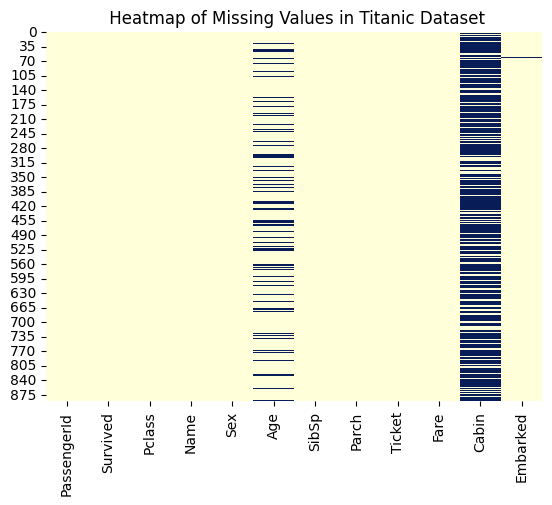

In [ ]:
# Heatmap for missing values
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False)
plt.title(" Heatmap of Missing Values in Titanic Dataset")
plt.show()

####**Step 3: Clean the Data**

In [ ]:
# Drop irrelevant or high missing value columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
# Fill missing 'Age' values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Fill missing 'Embarked' values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Missing values after cleaning
af_clean = df.isnull().sum()

af_clean = af_clean.reset_index()
af_clean.columns = ['Column', 'Missing Values']

display(af_clean)

,Column,Missing Values
0,Survived,0
1,Pclass,0
2,Sex,0
3,Age,0
4,SibSp,0
5,Parch,0
6,Fare,0
7,Embarked,0


####**Step 4: Encode Categorical Columns**

In [ ]:
# Convert 'Sex' to numeric: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encode 'Embarked' and drop first to avoid
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
# Overview
print("Final columns after encoding:\n")
print(df.columns)

Final columns after encoding:

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


####**Step 5: Define Features and Target**

In [ ]:
# Separate the input features and the target label
X = df.drop('Survived', axis=1)
y = df['Survived']

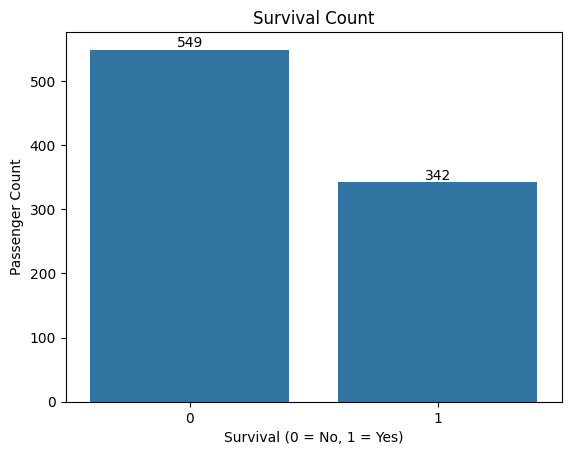

In [ ]:
# visiualize Survival count
ax = sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")

# Add text labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

####**Step 6: Split into Training and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####**Step 7: Scale Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Fit on training data, transform both sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####**Step 8: Train Classification Models**

In [ ]:
# Import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Initialize models
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svc_model = SVC()

In [ ]:
log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC()

####**Step 9: Evaluate Models**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Classifier": svc_model
}

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n\033[1m{name}\033[0m")
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression
Accuracy: 80.45 %
Confusion Matrix:
 [[98 12]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------

Decision Tree
Accuracy: 82.12 %
Confusion Matrix:
 [[96 14]
 [18 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------

Random Forest
Accuracy: 80.45 %
Confusion Matri

####**Step 10: Final Model Selection**

Based on all evaluation metrics, we selected Decision Tree as the final model.                                        
It gave the best accuracy (82.12%) and balanced performance on both classes.


In [ ]:
import joblib

# Save the trained Decision Tree model
joblib.dump(dt_model, 'titanic_model.pkl')

# Save the scaler used for feature scaling
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
